# Classification

Classification is a _supervised learning_ mechanism for labelling a sample based on the features. Supervised learning means that we have labels for classification or number for regression that the algorithm should learn. 

In sklearn we create a model instance and call the `.fit` method on in with the training data and training labels. We can now call the `.predict` method ( or the `.predic_proba` or the `.predict_log_proba` methods) with the fitted model. To evaluate the model, we use the `.score` with testing data and testing labels. 

The bigger challenge is usually arranging data in a form that will work with sklearn. The data (X) should be an (m by n) numpy array or pandas dataframe with m rows of sample data each with n features (columns). The label (y) is a vector or a pandas seris of size m with a value (class) for each sample. 

The `.score` method return the mean accuracy, which by itself might not be sufficient to evaluate a classifier. We will see other evaluation metrics. 

The general methos that sklearn type models implemented are:

* `fit(X,y[,sample_weight])` Fit a model
* `predict(X)` Predict classes
* `predict_log_proba(X)` Predict log probability 
* `predict_proba(X)` Predict probability 
* `score(X, y[,sample_weight])` Get accuracy

## Logistic Regression 

__Logistic Regression__ estimates probabilities by using a logistic function. 

The followinf are some model characteristics that we will inclide for each model:

* _Runtime efficiency_ -> Can use `n_jobs` if not using `liblinear` solver.

* _Process data_ -> If `solver` is set to `'sag'`, or `'saga'`, standardize so that convergence works. Can handle sparse input. 

* _Prevent overfitting__ -> The `C` parameter controls regularization. (Lower C is more regularization, higher means less) . Can specify `penalty` to `'l1'` or `'l2'` (the default)

* _Interpret results_ -> The `.coef_` attribute of the fitted model show the decision function coefficients. A change in x one unit changes the log odds ratio by the coefficient. The `.intercept_` attribute is the inverse log odds of the baseline condition. 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression

In [2]:
X_train = pd.read_excel('X_train.xls')
y_train = pd.read_excel('y_train.xls')
X_test = pd.read_excel('X_test.xls')
y_test = pd.read_excel('y_test.xls')
dfs = [X_train,y_train,X_test,y_test]
for d in dfs :
    d.drop(columns='Unnamed: 0', inplace = True)

In [3]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual = False, fit_intercept=True, intercept_scaling=1, max_iter=100, 
                   multi_class='ovr', n_jobs=1, penalty= 'l2', random_state=42, solver= 'liblinear', tol=0.0001, verbose = 0,
                  warm_start=False)

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(multi_class='ovr', n_jobs=1, random_state=42,
                   solver='liblinear')

In [4]:
lr.score(X_test, y_test)

0.7964376590330788

In [5]:
X = pd.read_excel('X.xls')
X.drop(columns='Unnamed: 0', inplace = True)

In [6]:
lr.predict(X.iloc[[0]])

array([0], dtype=int64)

In [7]:
lr.predict_proba(X.iloc[[0]])

array([[0.89854954, 0.10145046]])

In [8]:
lr.predict_log_proba(X.iloc[[0]])

array([[-0.10697343, -2.28818472]])

In [9]:
lr.decision_function(X.iloc[[0]])

array([-2.18121129])

### Instance parameters

* `penalty = 'l2'` -> Penalization norm, `'l1'` or `'l2'`

* `dual = False` -> Use dual formulation (only with `'l2'` and `'liblinear'`)

* `C = 1.0` -> Positive float. Inverse regularization strength. Smaller is stronger regularization 

* `fit_intercept = True` -> Add bias to the decision function. 

* `intercept_scaling = 1` -> If `fit_intercept` and `liblinear`, scale the intercept

* `max_iter = 100` -> Mazimum number of iterations

* `multi_class ovr` -> Use one versus rest for each class, or for `multinomial`, train one class. 

* `class_weight = None` -> Dictionary or `balanced`

* `solver = 'liblinear'` -> `'liblinear'` is good for small data. `'newton-cg'`, `'sag'`, `'saga'` and `'lbfgs'` are  for multiclass data. `'liblinear'` and `'saga'` only work with `'l1'` penalty. The others work with `'l2'` penalty. 

* `tol = 0.0001` -> Stopping tollerance. 

* `verbose = 0` -> Be verbose (if nonzero int).

* `warm_start = False` -> If `True`, remeber previous fit.

* `njobs = 1` -> Number of CPUs to use. -1 is all. Only works with `multi_class='over'` and `solver` is not `liblinear`


### Attributes after fitting

* `coef_` -> Decision function coefficients

* `intercept_` -> Intercept of the decision function

* `n_iter` -> Number of iterations

In [10]:
# The intercept is the log odds of the baseline condition. 
# We can convert it back to a percent accuracy (proportion)

lr.intercept_

array([-1.48860307])

In [11]:
# using the inverse logit function, we see that the baseline condition for survival is 18%

def inv_logit(p):
    return np.exp(p) / (1 + np.exp(p))

In [12]:
inv_logit(lr.intercept_)

array([0.18413149])

We can inspect the coefficients. The inverse logit of the coefficients gives the proportion of the positive cases. In this case, if fare goes up, we are more likely to survive. If sex is male, we are less likely to surivive:

In [13]:
cols = X.columns
for col, val in sorted(zip(cols, lr.coef_[0]), key = lambda x:x[1], reverse = True):
    print(f'{col:10}{val:10.3f} {inv_logit(val):10.3f}')


sex_female     2.432      0.919
embarked_C     0.334      0.583
fare           0.100      0.525
parch         -0.063      0.484
embarked_S    -0.240      0.440
embarked_Q    -0.266      0.434
sibsp         -0.273      0.432
age           -0.294      0.427
pclass        -0.735      0.324


Yellowbrick can also visualize the coefficients. This visualizer has a `relative=True` parameter that makes the largest value be 100 or (-100), and the others are the percentages of that

In [14]:
from yellowbrick.features import FeatureImportances

In [15]:
import matplotlib.pyplot as plt

In [16]:
y = pd.read_excel('y.xls')

C:\Users\alber\anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


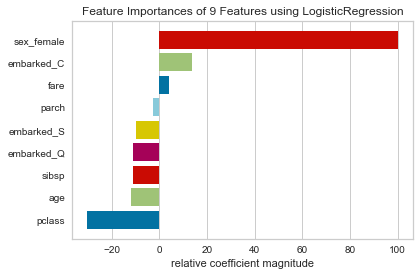

<AxesSubplot:title={'center':'Feature Importances of 9 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [17]:
fig, ax = plt.subplots(figsize = (6,4))
fi_viz = FeatureImportances(lr)
fi_viz.fit(X,y)
fi_viz.poof()

## Naive Bayes

Naive Bayes is a probabilistic classifier that assumes independence between the features of the data. 
It is popular for text classification applications, such as catching spam. One advantage of this model is that because it assumes features independence it can train a model with a small number of samples. (A downside is that it can not capture the interactions between features). This simple model can also work with data that has many features. As such, it serves as a good baseline model. 

There are three classes in sklearn: `GaussianNB`, `MultinomialNB` and `BernoulliNB`. The first assumes a Gaussian distribution (continuous features with a normal distribution), the second is for descrete occurence counts, and the third is for discrete Boolean features. 

This model has the following properties:

* `Runtime efficiency`: Training O(Nd) where N is the number of training example and d is dimensionality. Testing O(cd) where c is the number of classes.

* `Process data`: Assumes that data is independent. Should perform better after removing colinear columns. For continuous numerical data, might be good to bin data. Gaussian assumes normal distribution, and you might need to transform data to convert to normal distribution. 

* `Prevent overfitting`: Exhibits high bias and low variance (ensambles won't reduce variance). 

* `Interpret results`: Percentage is the likelihood that a sample belongs to a class based on priors. 


In [18]:
# Here is an example 
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
GaussianNB(priors = None, var_smoothing=1e-09)
nb.score(X_test, y_test)

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.732824427480916

In [19]:
nb.predict(X.iloc[[0]])

array([0], dtype=int64)

In [20]:
nb.predict_proba(X.iloc[[0]])

array([[0.97272623, 0.02727377]])

In [21]:
nb.predict_log_proba(X.iloc[[0]])

array([[-0.0276526 , -3.60182989]])

### Instance parameters:

* `priors=None`: Prior probabilities of classes
* `var_smoothing = 1e-09`: Added to variance for stable calculations.

### Attributes after fitting

* `class_prior_` : Probabilities of classes
* `class_count`: Counts of classes
* `theta_`: Mean of each column per class
* `sigma_`: Variance of each column per class
* `epsilon`: Additive value to each variance

__TIP__: These models are susceptible to the zero _probability problem_. If you try to classify a new sample that has no training data, it will have zero probability. One solution is to use _Laplace smoothing_. Sklearn controls this with the `alpha` parameter which defaults 1 and enables smoothing on the `MultinomialNB` and `BernoulliNB` models.

__ZERO PROBABILITY PROBLEM__ : One of the disadvantages of Naïve-Bayes is that if you have no occurrences of a class label and a certain attribute value together then the frequency-based probability estimate will be zero. And this will get a zero when all the probabilities are multiplied.

## Support Vector Machine

A support vector Machine (SVM) is an algorithm that tries to fit a line (or plane or hyperplane) between the different classes that maximise the distance from the line to the points of the classes. In this way it tries to find a robust separation between the classes. The _support vectors_ are the points oof the edge of the dividing hyperplane. 

__NOTE__: There are different SVM implementation in sklearn. `SVC` wraps the `libsvm`, while `LinearSVC` wraps the `liblinear` library. 

There is also the `linear_modelSGDClassifier`, which implements SVM when using the default `loss` parameter.

SVM generally performs well and can support linear spaces or nonlinear spaces by using the __kernel trick__.


The kernel trick is the ideaa that we can create a decision boundary in a new dimension by minimizing a formula that is easier to calculate than actually mapping the points to the new dimensions. The default kernel is Radial Basis Function (`'rbf'`), which is controlled by the `gamma` parameter and can map an input space into a high dimensional space.

SVMs have the following properties:

* __Runtime Efficiency__: The scikit-learn implementation is $O(n^{4})$, so it can be hard to scale to large sizes. Using a linear kernel or the `LinearSVC` model can imporve the runtime performance at perhaps the cost of accuracy. Upping the `cache_size` parameter can bring that down to $O(n^{3})$

* __Process data__: The algorithm is not scale invariant. Standardizing the data is highly reccomended. 

* __Prevent Overfitting__: The C (penalty parameter) controls regularization. A smaller value allows for a smaller margin in the hyperplane. A higher value for `gamma` will tend to overfit the training data. The `LinearSVC` model supports a `loss` and `penalty` parameter to support regularization. 

* __Interpret results__: Inspect `.support_vectors_`, though these are hard to explain. With linear kernels, you can inspect `.coef_`. 

In [22]:
# Here is an example using scikit-learn's SVM implementation
from sklearn.svm import SVC

svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)
SVC(C=1.0, cache_size=200, class_weight = None, degree = 3, gamma = 'auto', kernel = 'rbf', max_iter = -1, probability=True, 
    random_state=42, shrinking=True, tol = 0.001, verbose=False)
svc.score(X_test, y_test)

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7938931297709924

In [23]:
svc.predict(X.iloc[[0]])

array([0], dtype=int64)

In [24]:
svc.predict_log_proba(X.iloc[[0]])

array([[-0.16452588, -1.88582274]])

In [25]:
svc.predict_proba(X.iloc[[0]])

array([[0.8482958, 0.1517042]])

To get probability, use `probability = True`, which will slow down fitting of the model. 

This is similar to a perceptron, but will find the maximum margin. If the data is non linearly separable, it will minimize the error. Alternatively, a different kernel may be used. 

### Instance parameters

* `C = 1.0` The penalty parameter. The smaller the value, the tighter the decision boundary (more overfitting)

* `cache_size = 200` Cache size (MB). Bumping this up can improve training time on large datasets. 

* `class_weight = None` Dictionary or `balanced`. Use dictionary to set C  for each class

* `coef = 0.0` Independent term for poly and sigmoid kernels. 

* `decision_function_shape = 'ovr'` Use one vs rest or one vs one.

* `degree = 3` Degree for polynomial kernel

* `gamma = 'auto` Kernel coefficient. Can be a number, `scale` (default in 0.22, 1/(num features * X.std())), or `auto` (default priori, 1/(num features). A lower value leads to overfitting the training data. 

* `kernel = 'rbf'` Kernel type: `linear`, `poly`, `rbf` (default), `sigmoid`, `precomputed`, or a function. 

* `max_iter = -1` Maximum number of iterations for solver. -1 for no limit. 

* `probability = False` Enable probability estimation. Slows down training.

* `random_state = None` Random seed. 

* `shrinking = True` Use shrinking heuristic. 

* `tol = 0.001` Stopping tolerance

* `verbose = False` Verbosity

### Attributes after fitting

* `support_`: Support vector indices
* `support_vectors_` : Count of per-class support vectors
* `coef_` : Coefficients (for linear) kernel

## K-Nearest Neighbor

The k-nearest neighbor (KNN) algorithm classifies based on, distance to some number (k) of training sample. The algorithm family is called _instace-based_ learning as there are no parameters to learn. This model assumes that distances is sufficient for inference; otherwise it makes no assumptions about the underlying data or its distributions. 

The tricky part is selecting the appropriate k value. Also, the curse of dimensionality can hamper distance metrics as there is little difference in high dimensions between nearest and farthest neighbor. 

Nearest neighbor models have the following properties:

* __Runtime efficiency__ Training $O(1)$, but need to store data. Testing O(Nd) where N is the number of training examples and d is the dimensionality. 

* __Process data__ Distance based calculations perfrom better when standardized. 

* __Prevent overfitting__ Raise `n_neighbors`. Change `p` for L1 and L2 metric. 

* __Interpret results__ Interpret the k-nearest neighbors to the sample (using the `.kneighbors` method). Those neighbors (if you can explain them) explain your result. 

In [26]:
# Here is an example of using the model 
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
KNeighborsClassifier(algorithm = 'auto', leaf_size=30, metric = 'minkowski', metric_params=None, n_jobs=1, 
                     n_neighbors = 5, p = 2, weights = 'uniform')
knc.score(X_test, y_test)

C:\Users\alber\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7608142493638677

In [27]:
knc.predict(X.iloc[[0]])

array([0], dtype=int64)

In [28]:
knc.predict_proba(X.iloc[[0]])

array([[0.8, 0.2]])

### Attributes

* `algorithm = 'auto'` Can be `'brute'`, `'ball_tree'`or `kd_tree`
* `leaf_size = 30` Used for tree algorithms
* `metric = 'minkowski'` Distance metric
* `metric_params = None` Additional dictionary of parameters for custom metric function 
* `n_jobs = 1` Number of CPUs
* `n_neighbors = 5` Number of neighbors 
* `p = 2` Minkowski power parameter: 1 = manhattan (L1), 2 = Euclidean (L2)
* `weights = 'uniform'` Can be 'distance', in which case, closer points have more influence. 

__NOTE__: If k is an even number and the neighbors are split, the results depends on the order of the training data.  

## Decision Trees

We can use a process to create a decision tree and have a series of questions to predict a target class. The advantages of this model include support for nonnumeric data (in some implementations), little data preparation (no need for scaling), support for dealing, with non linear relationships, feature importances are revealed, and it is easy to explain. 

The default algorithm used for the creation is called the classification and regression tree (CART). It uses the Gini impurity or index measure to construct the decisions. This is done by looping over the features and finding the value that fives the lowest probability of misclassifying. 

__TIP__: The default values will lad to a fully grown (read overfit) tree. Use a mechanism such as `max_depth` and cros validation to control for this. 

Decision trees have the following properties: 
* __Runtime efficiency__ For creation, loop over each of the m features, and sort all n samples, $O(mn log n)$. For predicting, you walk the tree, $O(height)$. 
* __Preprocessing data__ Scaling is not necessary. Need to get rid of missing values and convert to numeric 
* __Prevent overfitting__ Set `max_depth` to a lower number, rais `min_impurity_decrease`. 

Interpret results 

Can step through the tree choices. Beacause there are steps, a tree is bad at dealing with linear relationships ( a small change in a number can go down a different path). The tree is also highly dependent on the training data. A small change can change the whole tree. 


In [29]:
# Here is an example using the scikit-learn library: 

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
DecisionTreeClassifier(class_weight=None, criterion = 'gini', max_depth=None, max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, 
                      splitter = 'best')
dt.score(X_test, y_test)

0.811704834605598

In [30]:
dt.predict(X.iloc[[0]])

array([0], dtype=int64)

In [31]:
dt.predict_log_proba(X.iloc[[0]])

array([[-0.12835003, -2.11648281]])

In [32]:
dt.predict_proba(X.iloc[[0]])

array([[0.87954545, 0.12045455]])

### Instance parameters:

* `class_weight = None` Weights for class in dictionary. `balanced` will set the values to the inverse proportion of class frequencies. Default is a value of 1 for each class. For multiclass, need a list of dictionaries, one-versus-rest (OVR) for each class. 
* `criterion = 'gini'` Splitting function, `'gini'`, or `'entropy'`
* `max_depth = None` Depth of tree. Deafult will build until the leaves contain less than `min_samples_split`
* `max_features = None` Number of features to examine for split. Default is all. 
* `max_leaf_nodes = None` Limit the number of leaves. Default is unlimited
* `min_impurity_decrease = 0.0` Split node if a split will decrease impurity >= value. 
* `min_impurity_split = None` Deprecated
* `min_sample_leaf = 1` Minimum number of samples at each leaf
* `min_sample_split = 2` Minimum number of samples required to split a node. 
* `min_weight_fraction_leaf = 0.0` Minimum sum total of weights required for leaf nodes. 
* `presort = False` May speed up training with a small dataset or restricted depth if set to True
* `random_state = None` Random seed
* `splitter = 'best'` Use `'random'` or `'best'`


### Attributes after fitting

* `classes_` Class labels
* `feature_importance` Array of Gini importance
* `n_classes_` Number of classes
* `n_features_` Number of features 
* `trees` Underlying tree object

### View Tree

In [33]:
from dtreeviz.trees import *

[Text(223.2, 261.6075, 'sex_female <= 0.5\ngini = 0.462\nsamples = 916\nvalue = [585, 331]\nclass = died'),
 Text(111.6, 186.8625, 'age <= -1.492\ngini = 0.294\nsamples = 592\nvalue = [486, 106]\nclass = died'),
 Text(55.8, 112.1175, 'sibsp <= 1.351\ngini = 0.498\nsamples = 30\nvalue = [14, 16]\nclass = survived'),
 Text(27.9, 37.3725, 'gini = 0.208\nsamples = 17\nvalue = [2, 15]\nclass = survived'),
 Text(83.69999999999999, 37.3725, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]\nclass = died'),
 Text(167.39999999999998, 112.1175, 'pclass <= -0.958\ngini = 0.269\nsamples = 562\nvalue = [472, 90]\nclass = died'),
 Text(139.5, 37.3725, 'gini = 0.423\nsamples = 122\nvalue = [85, 37]\nclass = died'),
 Text(195.29999999999998, 37.3725, 'gini = 0.212\nsamples = 440\nvalue = [387, 53]\nclass = died'),
 Text(334.79999999999995, 186.8625, 'pclass <= 0.231\ngini = 0.424\nsamples = 324\nvalue = [99, 225]\nclass = survived'),
 Text(279.0, 112.1175, 'fare <= -0.03\ngini = 0.124\nsamples = 166\nvalue

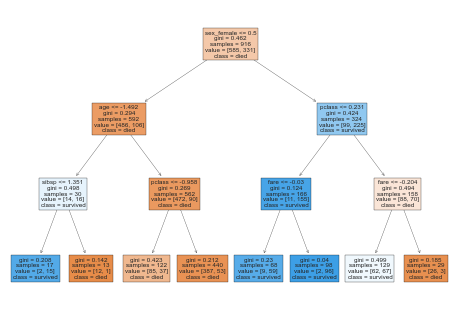

In [34]:
tree.plot_tree(dt, feature_names = X.columns, class_names=['died', 'survived'], filled = True )

Graphviz is open source graph visualization software. Graph visualization is a way of representing structural information as diagrams of abstract graphs and networks. In data science, one use of Graphviz is to visualize decision trees. I should note that the reason why I am going over Graphviz after covering Matplotlib is that getting this to work can be difficult. The first part of this process involves creating a dot file. A dot file is a Graphviz representation of a decision tree. The problem is that using Graphviz to convert the dot file into an image file (png, jpg, etc) can be difficult. There are a couple ways to do this including: installing python-graphviz though Anaconda, installing Graphviz through Homebrew (Mac), installing Graphviz executables from the official site (Windows), and using an online converter on the contents of your dot file to convert it into an image.


https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

In [35]:
import graphviz

In [36]:
#! pip install pydotplus

In [37]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(dt,
                    out_file = dot_data,
                    feature_names = X.columns,
                    class_names = ['Died', 'Survived'],
                    filled = True)

g = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [38]:
#g.write_png('trees.png')


# https://stackoverflow.com/questions/39956430/plotting-decision-tree-graphvizm-pydotplus
# https://stackoverflow.com/questions/18438997/why-is-pydot-unable-to-find-graphvizs-executables-in-windows-8

The dtreeviz package can aid in understanding how the decision trees works. It creates a tree with labeled histograms, which gives valuable insight. 

https://github.com/parrt/dtreeviz

In [39]:
#! pip install dtreeviz

In [40]:
from dtreeviz.trees import *

In [41]:
y.drop(columns = 'Unnamed: 0', inplace = True)

In [42]:
X_np = X.to_numpy()

In [43]:
y_np = y.to_numpy()

In [44]:
viz = dtreeviz(dt, X_np, y_np[:,0], target_name = 'survived', feature_names = X.columns, class_names = ['died', 'surivived'])

In [45]:
#import os
#os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [46]:
#viz.view()

Feature Importance showing Gini importance (reduction of error by using this feature. 

In [47]:
for col,val in sorted(zip(X.columns, dt.feature_importances_), key=lambda x:x[1], reverse = True)[:5]:
    print(f'{col:10}{val:10.3f}')

sex_female     0.607
pclass         0.248
sibsp          0.052
fare           0.050
age            0.043


In [48]:
from yellowbrick.features import FeatureImportances

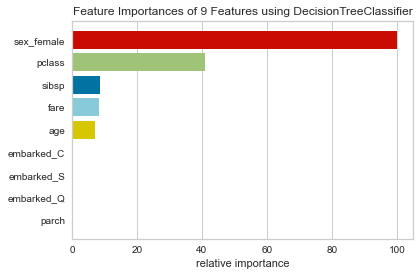

<AxesSubplot:title={'center':'Feature Importances of 9 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [49]:
fig,ax = plt.subplots(figsize=(6,4))
fi_viz = FeatureImportances(dt)
fi_viz.fit(X,y)
fi_viz.poof()

## Random Forest

A randaom forest is an ensemble of decision trees. It uses _bagging_ to correct the tendency of decision tree to overfit. 
By creating many trees trained on random subsamples of the samples and random features of the data, the variance is lowered. 

Because they train on subsamples of the data, random forests can evaluate OOB error and evaluate performance. They can also track feature importance by averaging the feature importance over all of the trees. 

The intuition for understanding bagging comes from a 1785 essay by Marquis de Condorcet. The essence is that if you are creating a jury, you should add anyone who has a greater than 50% chance of delivering the correct verdict and then average their decisions. Everytime you add another memeber ( and their selection process is independet of the others), you will get a better result. 

 The idea with random forests is to create a 'forest' of decision trees trained on different columns of the training data. If each tree has a better than 50% chance of correct classification, you should incorporate its prediction. The random forest has been an excellent tool for both classification and regression, though it has recently follen out of favor for __gradient-boosted trees__.
 
 
 Random forest has the following properties: 
 
 * __Runtime efficiency__ : Need to create j random trees. This can be done in parallel using `n_jobs`. Complexity for each tree is $O(mn  \log{n})$ where n is the number of samples and m is the number of features. For creation, loop over each of the m features, and sort all n samples, $O(mn  \log{n})$. For predicting, walk the tree $O(height)$
 
 * __Preprocess data__: Not necessary
 
 * __Prevent overfitting__: Add more trees (`n_estimators`). Use lower `max_depth`
 
 * __Interpret results__ : Supports features importance, but we do not have a single decision tree that we can walk through. Can inspect single trees from the ensamble.

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'gini', max_depth = None, max_features = 'auto', 
                      max_leaf_nodes= None, min_impurity_decrease = 0.0, min_impurity_split = None, min_samples_leaf = 1, 
                      min_samples_split = 2, min_weight_fraction_leaf = 0.0, n_estimators = 10, n_jobs = 1, oob_score = False, 
                      random_state = 42, verbose = 0, warm_start = False)
rf.score(X_test, y_test)

C:\Users\alber\AppData\Local\Temp/ipykernel_25676/1318942248.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.7964376590330788

In [51]:
rf.predict(X.iloc[[0]])

array([0], dtype=int64)

In [52]:
rf.predict_log_proba(X.iloc[[0]])

array([[-0.07832197, -2.58583257]])

In [53]:
rf.predict_proba(X.iloc[[0]])

array([[0.92466667, 0.07533333]])

### Instance parameters

These options mirror the decision tree

* `bootstrap = True` Bootstrap when building trees
* `class_weight = None` Weights for class in dictionary. `balanced` will set values to the inverse proportion of class frequencies. Default is a value of 1 for each class. For multiclass, need a list od dictionaries (OVR) for each class.
* `criterion = 'gini'` Splitting function `'gini'` or `'entropy'`
* `max_depth = None` Depth of the tree. Default will build until leaves contain less than `min_sample_split`
* `max_features = 'auto'` Number of features to examine for split. Default is all 
* `max_leaf_nodes = None` Limit the number of leaves. Default is unlimited
* `min_impurity_decrease = 0.0` Split node if a split will decrease impurity >= value
* `min_impurity_split = None` Deprecated
* `min_samples_leaf = 1` Minimum number of samples at each leaf
* `min_samples_split = 2` Minimum number of samples required to split a node
* `min_weight_fraction_leaf = 0.0` Minimum sum total of weights required for leaf nodes
* `n_estimators = 10` Number of trees in the forest
* `n_jobs = 1` Number of jobs for fitting and predicting
* `oob_score = False` Weather to estimate oob_score
* `random_state = None` random seed 
* `verbose = 0` Verbosity
* `warm_start = False` fit a new forest or use the existing one

### Attributes after fitting

* `classes_` : class labels
* `feature_importances_` array og Gini importance
* `n_classes` : number of classes
* `n_features` : number of features
* `oob_score_` : OOB score. Average accuracy for each observation not used in trees. 

Feature importance showing Gini importance (reduction of error by using that feature)

In [54]:
for col,val in sorted(zip(X.columns, rf.feature_importances_), key=lambda x:x[1], reverse = True)[:5]: 
    print(f'{col:10}{val:10.3f}')

age            0.274
fare           0.260
sex_female     0.248
pclass         0.092
sibsp          0.047


__TIP__: The random forest classifier computes the feature importance by determining the _mean decrease in impurity_ for each feature (also known as Gini importance). Features that reduce uncertainity in classification receive higher scores.

These numbers might be off if features vary in scale or cardinality of categorical columns. A more reliable socre is _permutation importance_ (where each coumn has its values permuted and the drop accuracy is measured). An even more reliable mechanism is _drop column importance_ (where each column is dropped and the model is re-evaluated) but sadly requires creating a new model for each column that is dropped. 

In [55]:
import rfpimp

In [56]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rfpimp.importances(rf, X_test, y_test).Importance

C:\Users\alber\AppData\Local\Temp/ipykernel_25676/4070230566.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Feature
sex_female    0.195929
age           0.058524
pclass        0.035623
fare          0.027990
sibsp         0.020356
parch         0.012723
embarked_Q    0.000000
embarked_C   -0.002545
embarked_S   -0.005089
Name: Importance, dtype: float64

## XGBoost

XGboost creates a weak tree and then 'boosts' the subsequent trees to reduce the residual errors. It tries to capture and address any patterns in the errors until they appear to be random. 

XGBoost has the following properties:

* __Runtime efficiency__ XGBoost is parallelizeable. Use the `n_jobs` option to indicate the number of CPUs. Use GPU for even better performance.
* __Preprocess data__ No scaling necessar with tree models. Need to encode categorical data. 
* __Prevent overfitting__ The `early_stopping_rounds = N` parameter can be set to stop training if there is no improvement after N rounds. L1 and L2 regularization are controlled by `reg_alpha` and `reg_lambda` respectively. Higher numbers are more conservative. 
* __Interpret results__ Has feature importance. 


XGBoost has an extra parameter for the `.fit` method. The `early_stopping_rounds` parameter can be combined with the `eval_set` parameter to tell XGBoost to stop creating trees if the evaluation metric has not improved after that many boosting rounds. The `eval_metric` can also be set to one of the following: `'rmse'`, `'mae'`, `'logloss'`, `'error'` (default), `'auc'`, `'aucpr'` as well as a custom function.      

In [57]:
import xgboost as xgb

xgb_class = xgb.XGBClassifier(random_state = 42)
xgb_class.fit(X_train, y_train, early_stopping_rounds=10, eval_set = [(X_test, y_test)])
xgb.XGBClassifier(base_score = 0.5, booster = 'gbtree', colsample_by_level = 1, colsample_bytree = 1, gamma = 0, learning_rate = 0.1,
             max_delta_step = 0, max_depth = 3, min_child_weigth = 1, missing = None, n_estimators = 100, n_jobs = 1, nthread = None,
              objective = 'binary:logistic', random_state = 42, reg_alpha = 0, reg_lambda = 1, scale_pos_weight = 1, seed = None, 
              silent = True, subsample = 1)

xgb_class.score(X_test, y_test)

[19:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.57787
[1]	validation_0-logloss:0.51931
[2]	validation_0-logloss:0.48476
[3]	validation_0-logloss:0.46473
[4]	validation_0-logloss:0.46228
[5]	validation_0-logloss:0.46175
[6]	validation_0-logloss:0.46192
[7]	validation_0-logloss:0.46219
[8]	validation_0-logloss:0.46251
[9]	validation_0-logloss:0.46676
[10]	validation_0-logloss:0.47085
[11]	validation_0-logloss:0.47193
[12]	validation_0-logloss:0.47416
[13]	validation_0-logloss:0.47293
[14]	validation_0-logloss:0.47214


C:\Users\alber\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7888040712468194

In [58]:
xgb_class.predict(X.iloc[[0]])

array([0], dtype=int64)

In [59]:
xgb_class.predict_proba(X.iloc[[0]])

array([[0.8291726 , 0.17082739]], dtype=float32)

### Instance parameter

* `max_depth = 3` Maximum depth
* `learning_rate =0.1` Learning rate (also called eta) for boosting (between 0 and 1). After each boost step, the newly added weights are scaled by this factro. The lower the value, the more conservative, but will also need more trees to converge. In the call `.train`, you can pass a `learning_rates` parameter, which is a list of rates at each round
* `n_estimators=100` Number of rounds or boosted trees. 
* `silent = True` Opposite of verbose. Whether to print messages while running boosting
* `objective = 'binary:logistic'` Learning task or callable for classification
* `booster = 'gbtree'` Can be `'gbtree'`, `'giblinear'`, or `'dart'`
* `nthread = None` Deprecated
* `n_jobs = 1` Number of threads to use
* `gamma = 0` Controls pruning. Range is 0 to infinite. Minimum loss redction needed to further split a leaf. Higher gamma is more conservative. If training and test scores are diverging, insert a higher number (around 10). If training and test scores are close, use a lower number. 
* `min_child_weight = 1` Minimum value for sum of hessian for a child
* `max_delta_step = 0` Make update more conservative. Set 1 to 10 for imbalanced classes. 
* `subsample = 1` Fraction of samples to use fro next round
* `colsample_bytree = 1` Fraction of columns to use for round.
* `colsample_bylevel = 1` Fraction of columns to use for level.
* `colsample_bynode = 1` Fraction of columns to use for node.
* `reg_alpha = 0` L1 regularization (mean of weights) encourages sparsity. Increase to be more conservative. 
* `reg_lambda = 1` L2 regularization (root of sqaured weights) encourages small weights. Increase to be more conservative. 
* `scale_pos_weight = 1` Ratio of negative/positive weight
* `base_score = .5` Initial prediction
* `seed = None` Deprecated
* `random_state = 0` Random seed. 
* `missing = None` Value to interpret for `missing`. None means `np.nan`
* `importance_type = 'gain'` The feature importance type: `'gain'`, `'weight'`. `'cover'`, `'total_gain'` or `'total_cover'`


### Attributes

* `coef_` coefficnets for gblinear learners
* `feature_importances_` Feature importances for gbtree learners. 

Feature importance is the average gain across all the nodes where the feature is used

In [60]:
for col,val in sorted(zip(X.columns, xgb_class.feature_importances_), key = lambda x:x[1], reverse = True)[:5]:
    print(f'{col:10}{val:10.3f}')

sex_female     0.590
pclass         0.235
sibsp          0.042
embarked_S     0.035
fare           0.028


XGBoost can plot the feature importance. It has an `importance_type` parameter. The default value is `'weight'`, which is the number of times a feature appears in a tree. It can also be `'gain'`, which shows the average gain when the feature is used, or `'cover'`, which is the number of samples affected by a split 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

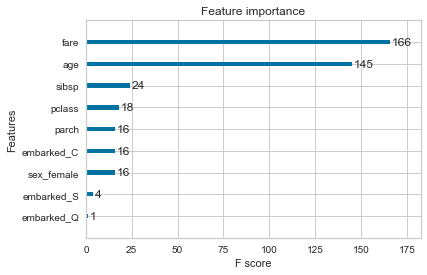

In [61]:
fig,ax = plt.subplots(figsize = (6,4))
xgb.plot_importance(xgb_class, ax = ax)


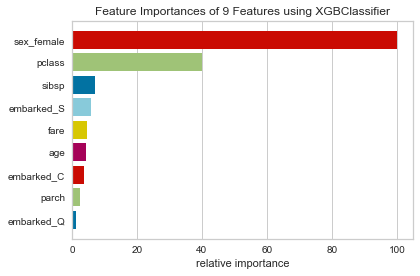

<AxesSubplot:title={'center':'Feature Importances of 9 Features using XGBClassifier'}, xlabel='relative importance'>

In [62]:
#Yellowbrick

fig,ax = plt.subplots(figsize = (6,4))
fi_viz = FeatureImportances(xgb_class)
fi_viz.fit(X,y)
fi_viz.poof()

XGBoost provides both a textual representation of the trees and a graphical one

In [63]:
booster = xgb_class.get_booster()
print(booster.get_dump()[0])


0:[sex_female<1] yes=1,no=2,missing=1
	1:[age<-1.49214959] yes=3,no=4,missing=3
		3:[sibsp<1.35050142] yes=7,no=8,missing=7
			7:[age<-2.164644] yes=13,no=14,missing=13
				13:leaf=0.0666666701
				14:leaf=0.450000018
			8:leaf=-0.388235331
		4:[pclass<-0.957598865] yes=9,no=10,missing=9
			9:[embarked_C<1] yes=15,no=16,missing=15
				15:[sibsp<-0.0363363475] yes=21,no=22,missing=21
					21:[fare<0.138877451] yes=27,no=28,missing=27
						27:leaf=-0.257142872
						28:leaf=-0.450000018
					22:leaf=-0.171428591
				16:[fare<0.618654251] yes=23,no=24,missing=23
					23:[sibsp<-0.0363363475] yes=29,no=30,missing=29
						29:leaf=-0.0782608688
						30:leaf=0.200000018
					24:[age<-0.439549625] yes=31,no=32,missing=31
						31:leaf=-0
						32:leaf=-0.25
			10:leaf=-0.451351374
	2:[pclass<0.23096557] yes=5,no=6,missing=5
		5:leaf=0.508235335
		6:[fare<-0.203860044] yes=11,no=12,missing=11
			11:[fare<-0.50003612] yes=17,no=18,missing=17
				17:leaf=0.400000036
				18:[fare<-0.355972826] 

The value in the leaf is the score for class 1. It can be converted into a probability using the logistic function. It can be converted into a probability using the logistic function.  

<AxesSubplot:>

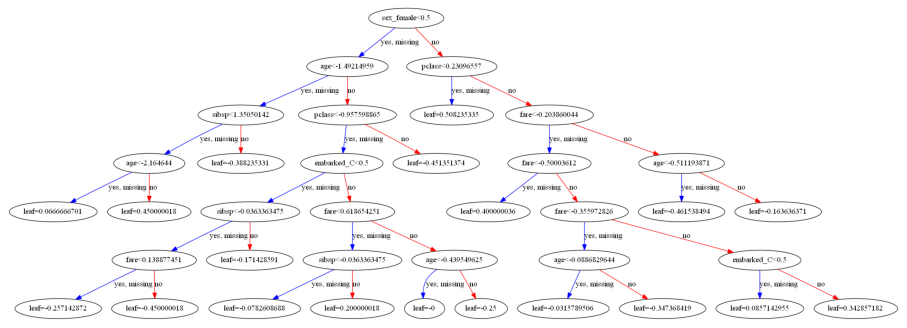

In [64]:
fig,ax = plt.subplots(figsize = (16,14))
xgb.plot_tree(xgb_class, ax = ax, num_trees = 0)

The xgbfir is a library built on top of XGBoost. This library gives various measures about feature importance. What is unique is that it provides these measures about the columns, and also pairs of columns, so you can see the interactions. In addition, you get information about triplets (three-column) interactions. 

The measures it provides are: 

* `Gain` Total gain of each feature or feature interaction. 
* `FScore` Amount of possible splits taken on a feature or feature interaction. 
* `wFScore` Amount of possible splits taken on a feature or feature interaction, weighted by the probability of the splits to take place.     
* `Average wFScore` wFScore divided by Fscore
* `Average gain` Gain divided by Fscore
* `Expecte gain` Total gain of each feature interaction weighted by the probability to gather the gain.

In [66]:
import xgbfir

In [68]:
xgbfir.saveXgbFI(xgb_class, feature_names = X.columns, OutputXlsxFile = 'fir.xlsx')
pd.read_excel('fir.xlsx').head(3).T

,0,1,2
Interaction,sex_female,fare,pclass
Gain,508.278687,249.05653,228.165601
FScore,16,166,18
wFScore,12.130713,34.570581,6.615096
Average wFScore,0.75817,0.208257,0.367505
Average Gain,31.767418,1.500341,12.675867
Expected Gain,505.918204,58.221739,85.773037
Gain Rank,1,2,3
FScore Rank,5,1,4
wFScore Rank,3,1,4


In [69]:
pd.read_excel('fir.xlsx', sheet_name='Interaction Depth 1').head(2).T

,0,1
Interaction,pclass|sex_female,age|sex_female
Gain,727.689279,497.455273
FScore,11,13
wFScore,4.22921,5.691471
Average wFScore,0.384474,0.437805
Average Gain,66.153571,38.26579
Expected Gain,266.515945,316.10256
Gain Rank,1,2
FScore Rank,11,8
wFScore Rank,7,5


## Gradient Boosted with LightGBM

LightGBM is an implementation by Microsoft. LightGBM uses a sampling mechanism to deal with continuous values. This allows quicker creation of trees (than say XGBoost), and reduces memory usage.

LightGBM also grows trees depth first (_leaf-wise_ rather than _level-wise_). Because of this, rather than using `max_depth` to control overfitting, use `num_leaves` (where this values is $<2(max\_depth)$

It has the following properties:

* __Runtime efficiency__  Can take advantage of multiple CPUs. By using binning, can be 15 times faster than XGBoost

* __Preprocess data__ Has some support for encoding categorical columns as integers, but AUC appears to suffer compared to one-hot-encoding. 

* __Prevent overfitting__ Lower `num_leaves`. Increase `min_data_in_leaf`. Use `min_gain_to_split` with `lambda_l1` or `lambda_l2`. 

* __Interpret results__ Feature importance is available. Individual trees are weak and tend to be hard to interpret. 

In [72]:
import lightgbm as lgb
lgbm_class = lgb.LGBMClassifier(random_state = 42)
lgbm_class.fit(X_train, y_train)  
lgb.LGBMClassifier(boosting_type = 'gbdt', 
              class_weight = None, 
              colsample_bytree = 1.0,
              learning_rate = 0.1,
              max_depth = -1,
              min_child_samples = 20, 
              min_child_weight = 0.001,
              min_split_gain = 0.0, 
              n_estimators = 100, 
              n_jobs = -1, 
              num_leaves = 31, 
              objective = None, 
              random_state = 42, 
              reg_alpha = 0.0, 
              reg_lambda = 0.0, 
              silent = True, 
              subsample = 1.0, 
              subsample_for_bin = 200000, 
              subsample_freq = 0)

lgbm_class.score(X_test, y_test)

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7938931297709924

### Instance parameters 

* `boosting_type = 'gbdt'` Can be 'gbdt' (gradient boosting), 'rf' (random forest), 'dart' (dropouts meet multiple additive regression trees), or 'goss' (gradient-based, one-sided sampling). 

* `class_weight = None` : Dictionary or 'balanced'. Use dictionary to set weight for each class label when doing multiclass probelms. For binary probelms, use `is_umbalance` or `scale_pos_weight`.

* `colsample_bytree = 1.0` Range (0,1.0). Select percent or features for each boosting round. 

* `importance_type = 'split'` How to calculate feature importance. 'split0 means number of times a feature is used. 'gain' is total gains of splits for a feature. 

* `learning_rate = 0.1` Range (0,1.0). Learning rate for boosting. A smaller values slows down overfitting as boosting rounds have less impact. A smaller number should give better performance but will require more `num_iterations`. 

* `max_depth = -1` Maximum tree depth. -1 is unlimited. Larger depths tend to overfit more. 

* `min_child_samples = 20` Number of samples required for a leaf. Lower numbers mean more overfitting. 

* `min_child_weight = 0.001` Sum of hessian weight required for a leaf. 

* `min_split_gain = 0.0` Loss reductioin required to partition a leaf. 

* `n_estimators = 100` Number of trees or boosting rounds. 

* `n_jobs = -1` Number of threads 

* `num_leaves = 31` Maximum tree leaves. 

* `objective = None` None is 'binary' or 'multiclass' for classifier. Can be a function or string. 

* `random_state = 42` Random seed. 

* `reg_alpha = 0.0` L1 regularization (mean of weights). Increase to be more conservative. 

* `reg_lambda = 0.0` L2 regularization (root of squared weights). Increase to be more conservative. 

* `silent = True` Verbose mode

* `subsample = 1.0` Fraction of samples to use for next round 

* `subsample_for_bin = 200000` Samples required to create bins

* `subsample_freq = 0` Subsample frequency. Change to 1 to enbale. 

### Feature importance based on 'splits'

In [74]:
for col, val in sorted(zip(cols, lgbm_class.feature_importances_), key = lambda x:x[1], reverse = True)[:5]:
    print(f'{col:10}{val:10.3f}')

fare        1249.000
age         1236.000
pclass       126.000
sex_female    91.000
sibsp         85.000


The LightGBM library supports creating a feature importance plot. The default is based on `'splits'`, the number of times a feature is used. You can specify `importance_type` if you want to change it to `'gain'`

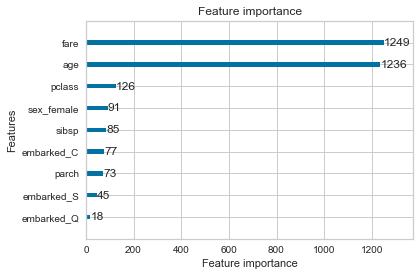

In [76]:
fig,ax = plt.subplots(figsize = (6,4))
lgb.plot_importance(lgbm_class, ax = ax)
fig.tight_layout()

<AxesSubplot:>

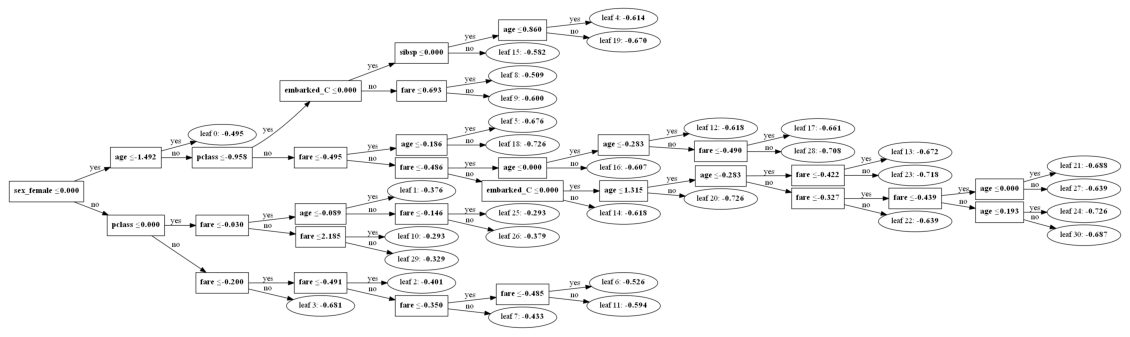

In [82]:
# We create a decision tree as well 

fig,ax = plt.subplots(figsize = (20,20))
lgb.plot_tree(lgbm_class, tree_index = 0, ax = ax)

## TPOT

TPOT  uses a generic algorithm to try differnt models and ensembles. This can take hours to days to run as it considers multiple models and preprocessing steps, as well as the hyperparameters for said models, and ensambling options. On a typical machine, a generation may take five or more minutes to run. 

It has the following properties:

* __Runtime efficiency__ : Can take hours or days. Use `n_jobs = -1` to use all CPUs

* __Preprocess data__ you need to remove NaN and categorical data. 

* __Prevent overfitting__ Ideally, results should use cross-validation to minimize overfitting. 

* __Interpert results__ Depends on the results

In [83]:
from tpot import TPOTClassifier


tc = TPOTClassifier(generations = 2)
tc.fit(X_train, y_train)
tc.score(X_test, y_test )

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7811704834605598

### Instance Parameters

* `generations = 100` Iterations to run.

* `population_size = 100` Population size for generic programming. Larger size usually perform better but takes more memory and time. 

* `offspring_size = None` Offspring for each generation. Default is `population_sizde`

* `mutation_rate = .9` Mutation rate for algorithm [0,1]. Default is .9. 

* `crossover_rate = .1` Cross-over rate ( how many pipelines to breed in a generation) Range [0,1]. Default is .1

* `scoring = 'accuracy'` Scoring mechanism

* `cv=5` Cross validation folds

* `subsample = 1` Subsample training instances. Range [0,1]. Default is 1. 

* `n_jobs = 1` Number of CPUs to use, -2 for all cores. 

* `max_time_mins = None` Max amount of minutes to run

* `max_eval_time_mins = 5` Max amount of minutes to evaluate a single pipeline

* `random_state = None` Randomseed

* `config_dict` Configuration options for optimizations. 

* `warm_start = False` Reuse previous calls to `.fit`

* `memory = None` Can cache pipelines. `'auto'` or a path will persist in a directory 

* `use_dask = False` Use dask

* `periodic_checkpoint_folder = None` Path to a folder where the best pipeline will be persisted periodically.

* `early_stop = None` Stop after tunning this many generations with no imporvement. 

* `verbosity = 0` O = None 1 = minimal, 2 = high, or 3 = all, 2 and higher shows a progress bar. 

* `disable_update_check = False` Disable version check


### Attributes

* `evaluated_individuals_` Dictionary with all pipelines that were evaluated

* `fitted_pipelines` Best pipeline